<a href="https://colab.research.google.com/github/Manoj250/AutoEncoder-with-keras/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from keras.layers import Dense,Conv2D,Conv2DTranspose,MaxPooling2D,Input,Flatten,Reshape,UpSampling2D

In [6]:
from keras import Model

In [26]:
from keras.datasets import mnist

In [29]:
import numpy as np

In [57]:
import matplotlib.pyplot as plt

In [58]:
import random

In [36]:
def build_encoder():
  input = Input(shape=(28,28,1))
  x = Conv2D(32,(3,3),strides=2,padding="same",activation="relu")(input)
  x = Conv2D(64,(3,3),strides=2,padding="same",activation="relu")(x)
  x = Flatten()(x)
  x = Dense(20)(x)
  encoder = Model(inputs=input,outputs=x)
  return encoder

In [37]:
build_encoder().summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 flatten_4 (Flatten)         (None, 3136)              0         
                                                                 
 dense_9 (Dense)             (None, 20)                62740     
                                                                 
Total params: 81,556
Trainable params: 81,556
Non-trainable params: 0
_________________________________________________________________


In [41]:
def build_decoder():
  input = Input(20)
  x = Dense(7*7*64)(input)
  x = Reshape((7,7,64))(x)
  x = Conv2DTranspose(64,(3,3),2,activation="relu",padding="same")(x)
  x = Conv2DTranspose(32,(3,3),2,activation="relu",padding="same")(x)
  x = Conv2DTranspose(1,(3,3),1,activation="sigmoid",padding="same")(x)
  decoder = Model(inputs = input , outputs = x)
  return decoder

In [42]:
build_decoder().summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 20)]              0         
                                                                 
 dense_13 (Dense)            (None, 3136)              65856     
                                                                 
 reshape_7 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_21 (Conv2D  (None, 14, 14, 64)       36928     
 Transpose)                                                      
                                                                 
 conv2d_transpose_22 (Conv2D  (None, 28, 28, 32)       18464     
 Transpose)                                                      
                                                                 
 conv2d_transpose_23 (Conv2D  (None, 28, 28, 1)        289

In [43]:
encoder = build_encoder()
decoder = build_decoder()

input = Input((28,28,1))
auto_encoder = Model(inputs=input,outputs=decoder(encoder(input)))

In [44]:
auto_encoder.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 model_15 (Functional)       (None, 20)                81556     
                                                                 
 model_16 (Functional)       (None, 28, 28, 1)         121537    
                                                                 
Total params: 203,093
Trainable params: 203,093
Non-trainable params: 0
_________________________________________________________________


In [45]:
(x_train,_),(x_test,_) = mnist.load_data()

In [46]:
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [47]:
x_train,x_test = np.expand_dims(x_train,axis=-1),np.expand_dims(x_test,axis=-1)

In [52]:
np.max(x_train)

255

In [53]:
x_train,x_test = x_train.astype("float32")/255.0,x_test.astype("float32")/255.0

In [54]:
np.max(x_train)

1.0

In [48]:
print(x_train.shape,x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [55]:
auto_encoder.compile(optimizer="Adam",loss="binary_crossentropy")

In [56]:
auto_encoder.fit(x_train,x_train,epochs=10,verbose=1,validation_data=(x_test,x_test))

Epoch 1/10
1875/1875 [==============================] - 95s 50ms/step - loss: 0.1320 - val_loss: 0.0884
Epoch 2/10
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0863 - val_loss: 0.0834
Epoch 3/10
1875/1875 [==============================] - 95s 50ms/step - loss: 0.0830 - val_loss: 0.0815
Epoch 4/10
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0812 - val_loss: 0.0803
Epoch 5/10
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0802 - val_loss: 0.0796
Epoch 6/10
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0794 - val_loss: 0.0791
Epoch 7/10
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0788 - val_loss: 0.0786
Epoch 8/10
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0783 - val_loss: 0.0782
Epoch 9/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0779 - val_loss: 0.0778
Epoch 10/10
1875/1875 [==============================] - 96s 51m

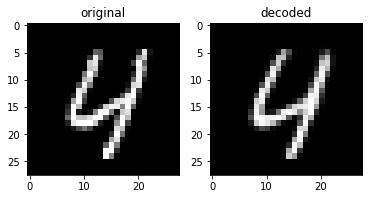

In [68]:
random_image = random.choice(x_test)
decoded_image = auto_encoder.predict(np.expand_dims(random_image,axis=0))

plt.subplot(1,2,1)
plt.title("original")
plt.imshow(random_image.squeeze(),cmap="gray")

plt.subplot(1,2,2)
plt.title("decoded")
plt.imshow(decoded_image.squeeze(),cmap="gray")

plt.show()
